<a href="https://colab.research.google.com/github/kotatochip7879/Pakinson-classification-and-UI/blob/main/Copy_of_pakinsonMRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import os

path = os.listdir('/content/drive/MyDrive/Pakinson/pakinson project/dataset/train/')
classes = {'non_pakinson':0, 'pakinson':1}

In [ ]:
import cv2
X = []
Y = []
for cls in classes:
  pth = '/content/drive/MyDrive/Pakinson/pakinson project/dataset/train/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j, 0)
    img = cv2.resize(img, (200,200))
    X.append(img)
    Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

0    20
1    13
dtype: int64

In [ ]:
X.shape

(33, 200, 200)

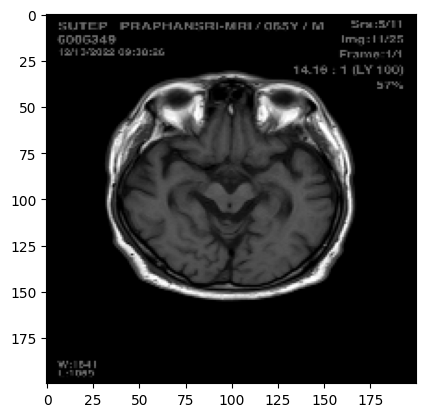

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:

X_updated = X.reshape(len(X), -1)
X_updated.shape

(33, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y , random_state=10, test_size = .20)

In [ ]:
xtrain.shape, xtest.shape

((26, 40000), (7, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_tranform(xtrain)
#pca_test = pca.fit_tranform(xtest)
pca_train = xtrain
pca_test = xtest

(26, 40000) (7, 40000)


In [ ]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [ ]:
print("Training score:", lg.score(pca_train, ytrain))
print("Testing score:", lg.score(pca_test, ytest))


Training score: 1.0
Testing score: 0.8571428571428571


In [ ]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([1]),)

In [ ]:
pred[1]

1

In [ ]:
ytest[1]

0

In [ ]:
dec = {0:'non_pakinson', 1:'pakinson'}

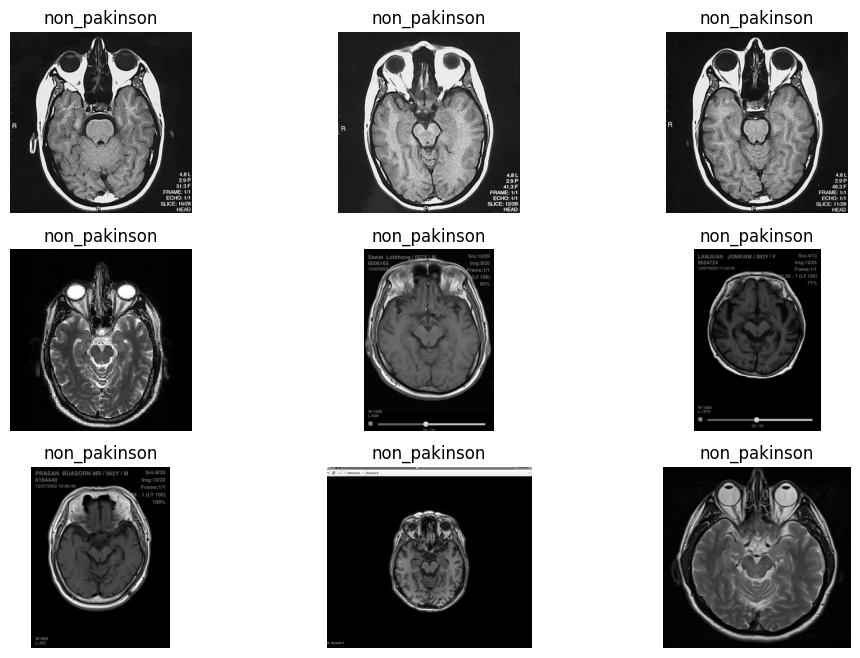

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/')
c=1
for i in os.listdir('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/non_parkinson/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/non_parkinson/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

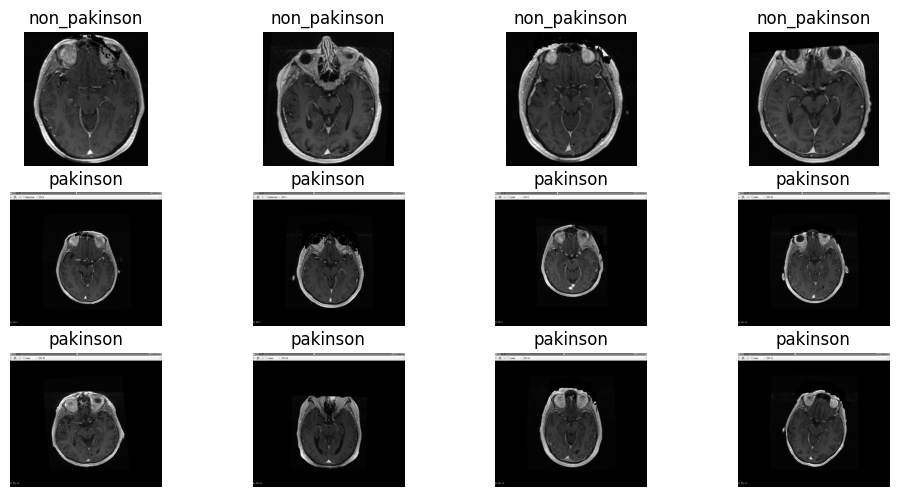

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/')
c=1
for i in os.listdir('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/pakinson/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('/content/drive/MyDrive/Pakinson/pakinson project/dataset/test/pakinson/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1